In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest
from scipy.stats import shapiro

In [2]:
# import CSV into DataFrame
tags = pd.read_csv("tag_scores.csv")

In [3]:
# cast tag data into arrays
kindle = np.array(tags['kindle'])
epub = np.array(tags['epub'])
calibre = np.array(tags['calibre'])
ebook_readers = np.array(tags['ebook-readers'])
pdf = np.array(tags['pdf'])
conversion = np.array(tags['conversion'])
kindle_paperwhite = np.array(tags['kindle-paperwhite'])
amazon = np.array(tags['amazon'])
mobi = np.array(tags['mobi'])
kobo = np.array(tags['kobo'])

# remove 'nan' values
kindle = kindle[~np.isnan(kindle)]
epub = epub[~np.isnan(epub)]
calibre = calibre[~np.isnan(calibre)]
ebook_readers = ebook_readers[~np.isnan(ebook_readers)]
pdf = pdf[~np.isnan(pdf)]
conversion = conversion[~np.isnan(conversion)]
kindle_paperwhite = kindle_paperwhite[~np.isnan(kindle_paperwhite)]
amazon = amazon[~np.isnan(amazon)]
mobi = mobi[~np.isnan(mobi)]
kobo = kobo[~np.isnan(kobo)]

In [4]:
# create an array of the data samples
data = [pdf,
        mobi, 
        kobo, 
        kindle_paperwhite, 
        kindle, 
        epub, 
        ebook_readers, 
        conversion, 
        calibre, 
        amazon]

In [5]:
# check if data samples are drawn from normal/Gaussian distributions
for x in data:
    stat1, p1 = normaltest(x)
    stat2, p2 = shapiro(x)
    if p1 <= 0.05 or p2 <= 0.05:
        print('Sample does not look Gaussian. Reject H0.')

Sample does not look Gaussian. Reject H0.
Sample does not look Gaussian. Reject H0.
Sample does not look Gaussian. Reject H0.
Sample does not look Gaussian. Reject H0.
Sample does not look Gaussian. Reject H0.
Sample does not look Gaussian. Reject H0.
Sample does not look Gaussian. Reject H0.
Sample does not look Gaussian. Reject H0.
Sample does not look Gaussian. Reject H0.
Sample does not look Gaussian. Reject H0.


In [6]:
# calculate p-value using Kruskal-wallis Test instead of ANOVA, 
# because the data samples are non-parametric.
stat, p = stats.kruskal(kindle, 
                        epub, 
                        calibre, 
                        ebook_readers, 
                        pdf,
                        conversion,
                        kindle_paperwhite, 
                        amazon, 
                        mobi, 
                        kobo)
if p >= 0.05:
    print('p-value: ', p)
    print('Tag scores are not significantly different. Fail to reject H0.')

p-value:  0.7779711083987956
Tag scores are not significantly different. Fail to reject H0.


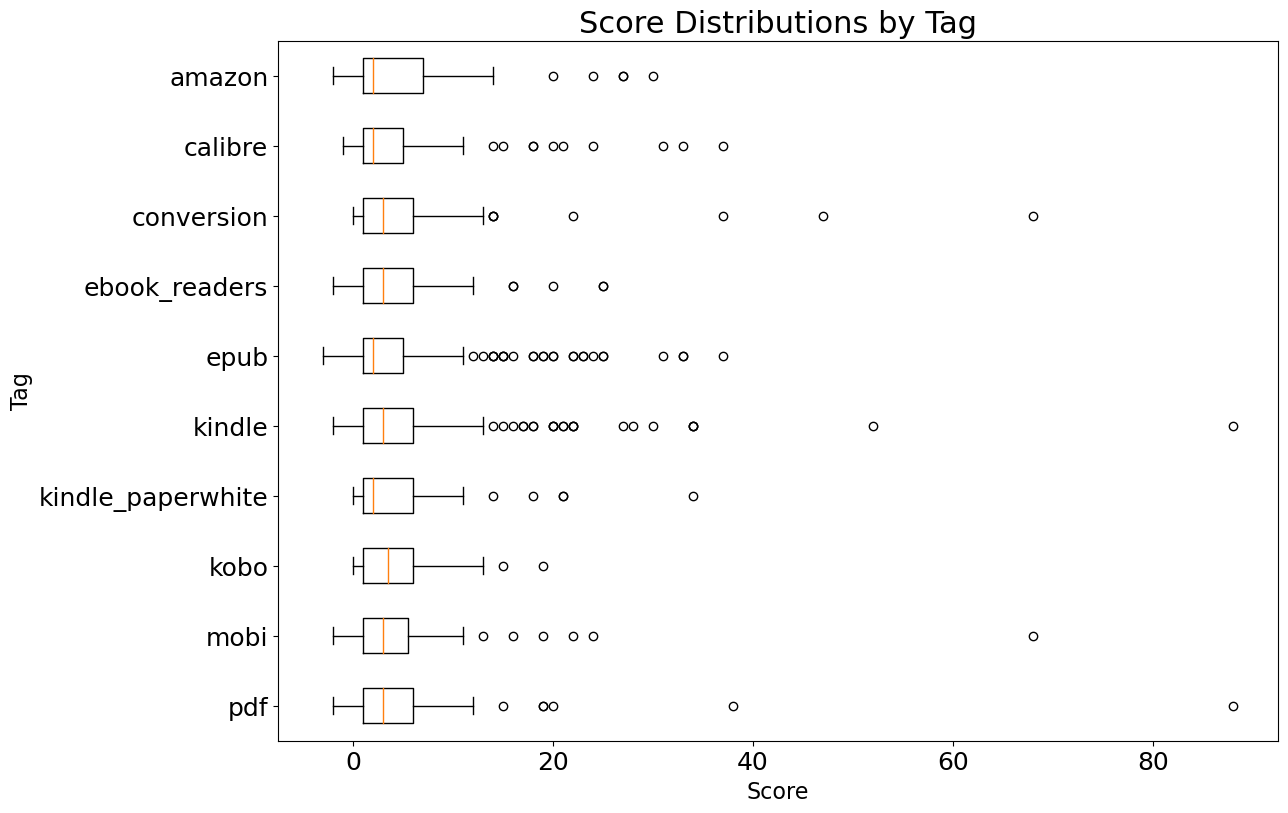

In [7]:
# create figure instance
fig = plt.figure(figsize = (10, 7))
 
# create axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# create plot
tag_labels = ['pdf',
              'mobi', 
              'kobo', 
              'kindle_paperwhite', 
              'kindle', 
              'epub', 
              'ebook_readers', 
              'conversion', 
              'calibre', 
              'amazon']
bp = ax.boxplot(data, vert=False, labels=tag_labels)
# bp = ax.boxplot(data, vert=False)

# add plot title 
font_title = {'size': 22}
plt.title("Score Distributions by Tag", fontdict=font_title)

# add axis labels
font_axis = {'size': 16}
plt.xlabel('Score', fontdict=font_axis)
plt.ylabel('Tag', fontdict=font_axis)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# show plot
plt.show()